In this exercise you will implement a method for inferring the posterior probability density of the variance of the distribution from which a set of samples were drawn. You will use Bayes' theorem to derive a posterior probability distribution for this variance. You will then proceed, in a rather gratuitous application of the Metropolis-Hasting algorithm, to sample from this posterior density to form a Markov chain. We then use the Markov chain to estimate the posterior density. I call this application 'rather gratuitous' because we already know the posterior density and can plot it and do anything we want with it. The utility of generating a Markov chain will become more evident in the group project. 

1) Assume a Gaussian random number generator with zero mean and variance a is producing samples, x,  with posterior density P(x|a) = N(a) e^{-x^2/(2a)}. Analytically find N(a) so that P(x|a) is appropriately normalized.

3) Use Bayes’s theorem to calculate P(a|{x}) when one has multiple samples drawn;  {x} =  (x_1, x_2, x_3, ... x_n).

4) Draw 100 samples and plot the resulting P(a|{x}).

5) Use the Metropolis Hastings algorithm to sample from this posterior and create a Markov chain.

6) Plot a "trace plot" which is sample number vs. parameter value.

7) Plot a histogram of the chain with variance a as the x axis and compare with P(a|x). Indicate in your graph the true value of the variance.

Develop in the VS Code IDE under version control on your own GitHub repo. Submit a link to the GitHub repo.

 

NOTE: 

1) In (3), simply adopt a uniform prior, which means P(a) is independent of a.

2) In (3), you only need to calculate an un-normalized P(a|x); i.e., don't concern yourself with factors that have no dependence on a. If you do want to normalize P(a|x) you can do so by making sure that \int da P(a|x)=1 -- but you don't have to.

# 1

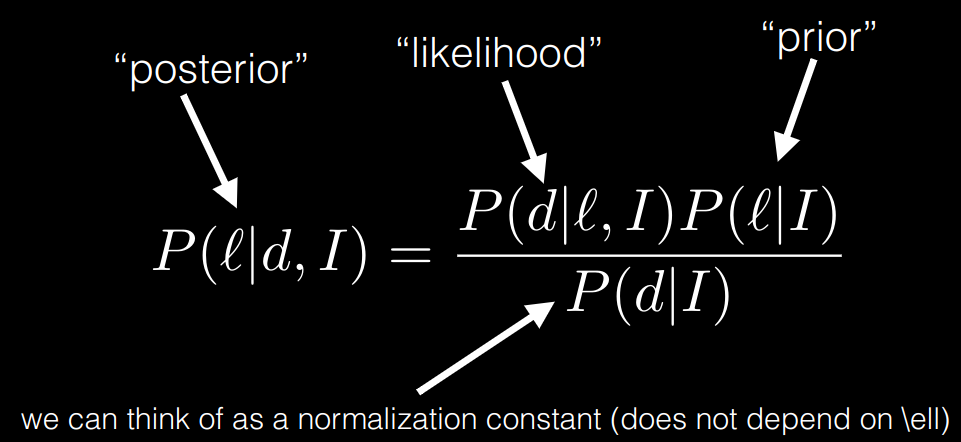

Given $P(x|a) = N(a) e^{-x^2/(2a)}$, normilize to find $N(a)$


We do this in the normal way; integrate and set equal to 1, solving for $N(a)$


$\int_{-\inf}^{\inf} e^{-x^2/(2a)} dx = \frac{1}{N(a)}$

$\sqrt{2 \pi a} = \frac{1}{N(a)}$

$N(a) = \sqrt{\frac{1}{2 \pi a}}$

so,

$P(x|a) = \sqrt{\frac{1}{2 \pi a}} e^{-x^2/(2a)}$

# 3

I relied heavily on Gabe's explanation and this link https://towardsdatascience.com/understand-bayes-rule-likelihood-prior-and-posterior-34eae0f378c5#:~:text=Likelihood%20refers%20to%20the%20probability,came%20from%20a%20specific%20scenario.

Using our symbols, bayes says

$P(a|x) =\frac{P(x|a)P(a)}{P(x)}$

Or assuming a uniform prior and absorbing the normalization into the constant , 

$P(a|x) \propto P(x|a)$

Now, for a set of $x_i$'s, $\{x\}$, we compute the probability as a sum. This would be like trying to compute the fainess of a coin given flips. When you have fair coin data, the likelihood of getting the data you got is the product of each likelihood. 

We now have 

$P(a|\{x\}) \propto \Pi_i^N P(x_i|a)$

Which we can evaluate,

$P(a|\{x\}) \propto \sqrt{\frac{1}{2 \pi a}}^N exp(- \frac{\Sigma_i^N x^2}{2a})$

We see this breaks at a <= 0, so add the condition a > 0

# 4 

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
def loglikelihood(a, x):
    '''
    Computes the log of the likelihood assuming a gausian 
    Inputs: 
    Int: a 
        the variance we would like to test
    Int: x  
        an array of data.
    Returns: 
    Int: loglikelihood
        log of the log likelihood function
    '''
    N = len(x)
    loglike = 0
    loglike = N * np.log(1./(np.sqrt(2*np.pi*a))) - np.sum(x**2)/(2*a)
    return loglike

def posterior(a, x):
    '''
    Computes posterior of variance of a
    Inputs: 
    Int: a 
        the variance we would like to test
    Int: x  
        an array of data.
    Returns: 
    Int: post
        posterior of variance of trial a
    '''
    post = 0
    if (a>0):
        post = np.exp(loglikelihood(a, x))
    return post
                      

''

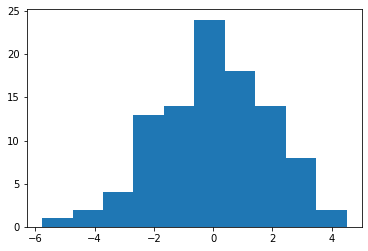

In [124]:
#generate data

a = 3 #variance
N_samp=100
samples = np.random.normal(loc=0.0, scale=np.sqrt(a), size=N_samp)
plt.hist(samples)
;

''

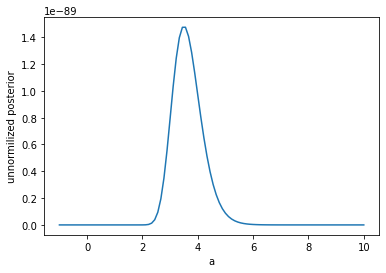

In [125]:
a_list = np.linspace(-1,10,100)
post_list = []
for a_i in a_list:
    post_list.append(posterior(a_i, samples))
plt.plot(a_list, post_list)
plt.xlabel('a')
plt.ylabel('unnormilized posterior')
;

# 5

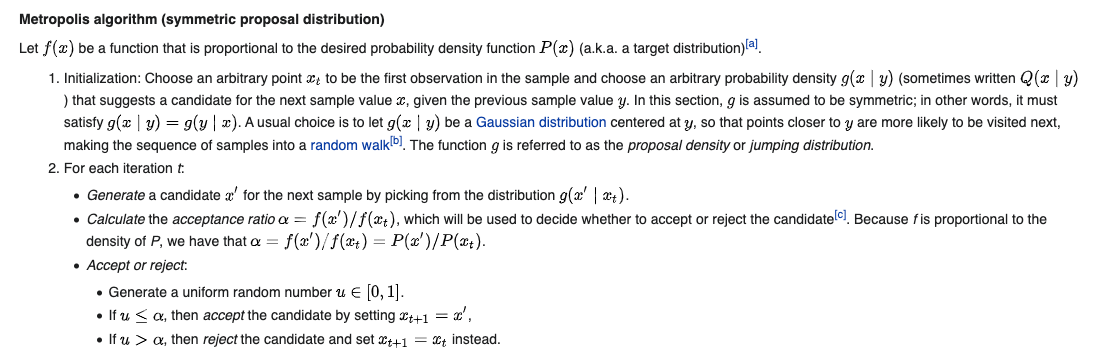

in english and using our symbols (with help from https://www.youtube.com/watch?v=0lpT-yveuIA)

1) pick initial point. For us, that is a_0

2) Iterate over i = 1, ..., m
    
    a)draw a^* from q(